Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn


In [4]:
import pandas as pd
import numpy as np
import random
from faker import Faker

faker = Faker()

In [ ]:
# !pip install Faker

In [6]:
def generate_customer_data(n=1000):
    data = []

    for i in range(n):
        customer_id = i
        age = random.randint(18, 70)
        gender = random.choice(["Male", "Female"])
        annual_income = round(np.random.normal(50000, 15000), 2)
        total_spend = round(np.random.normal(1000, 300), 2)
        years_as_customer = random.randint(0, 10)
        num_of_purchases = random.randint(1, 100)
        avg_transaction = round(np.random.normal(80, 20), 2)
        num_of_returns = random.randint(0, 5)
        num_of_support = random.randint(0, 10)
        satisfaction = random.randint(1, 5)
        days_ago = random.randint(1, 100)
        email_opt_in = random.choice([True, False])
        promotion_response = random.choice(["Responded", "Ignored", "Unsubscribed"])

        # 이탈 조건 점수 (약간 완화)
        churn_score = 0
        if total_spend < 600: churn_score += 1
        if satisfaction <= 2: churn_score += 1
        if num_of_support >= 6: churn_score += 1
        if days_ago >= 70: churn_score += 1
        if years_as_customer <= 1: churn_score += 1

        # 눈치껏 살짝 랜덤성 섞기
        if churn_score >= 2:
            target_churn = random.random() < 0.8  # 높은 확률로 True
        else:
            target_churn = random.random() < 0.2  # 낮은 확률로 True

        data.append([
            customer_id, age, gender, annual_income, total_spend, years_as_customer,
            num_of_purchases, avg_transaction, num_of_returns, num_of_support,
            satisfaction, days_ago, email_opt_in, promotion_response, target_churn
        ])

    columns = [
        "Customer_ID", "Age", "Gender", "Annual_Income", "Total_Spend", "Years_as_Customer",
        "Num_of_Purchases", "Average_Transaction_Amount", "Num_of_Returns", "Num_of_Support_Contacts",
        "Satisfaction_Score", "Last_Purchase_Days_Ago", "Email_Opt_In",
        "Promotion_Response", "Target_Churn"
    ]

    return pd.DataFrame(data, columns=columns)


In [7]:
df = generate_customer_data(30000)
df

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,0,32,Female,21598.64,1016.86,5,7,83.78,1,7,4,31,True,Ignored,True
1,1,22,Male,50863.96,698.34,1,27,52.69,5,10,4,95,False,Ignored,True
2,2,55,Male,68784.29,963.37,2,53,118.19,2,9,5,65,False,Unsubscribed,False
3,3,62,Female,40830.63,1012.35,4,42,59.96,4,5,3,74,True,Responded,True
4,4,42,Female,40948.21,801.34,9,29,131.33,1,3,2,79,False,Unsubscribed,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,26,Female,49233.38,1009.20,1,23,120.93,4,5,3,61,True,Unsubscribed,False
29996,29996,55,Female,48178.30,959.83,0,47,79.16,3,2,4,87,False,Responded,True
29997,29997,32,Female,58638.91,1193.06,5,44,73.31,1,4,2,24,False,Ignored,False
29998,29998,35,Male,64190.53,1307.53,4,24,89.64,4,1,2,62,False,Ignored,False


In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 30000 non-null  int64  
 1   Age                         30000 non-null  int64  
 2   Gender                      30000 non-null  object 
 3   Annual_Income               30000 non-null  float64
 4   Total_Spend                 30000 non-null  float64
 5   Years_as_Customer           30000 non-null  int64  
 6   Num_of_Purchases            30000 non-null  int64  
 7   Average_Transaction_Amount  30000 non-null  float64
 8   Num_of_Returns              30000 non-null  int64  
 9   Num_of_Support_Contacts     30000 non-null  int64  
 10  Satisfaction_Score          30000 non-null  int64  
 11  Last_Purchase_Days_Ago      30000 non-null  int64  
 12  Email_Opt_In                30000 non-null  bool   
 13  Promotion_Response          300

,Customer_ID,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,14999.500000,44.098567,50030.036016,1000.794507,4.997567,50.527567,79.889100,2.495300,4.973533,2.981467,50.452867
std,8660.398374,15.367700,15034.643042,300.743277,3.158844,28.874991,20.051354,1.710422,3.165738,1.410434,29.022600
min,0.000000,18.000000,-7969.710000,-171.570000,0.000000,1.000000,3.410000,0.000000,0.000000,1.000000,1.000000
25%,7499.750000,31.000000,39819.510000,799.535000,2.000000,25.000000,66.277500,1.000000,2.000000,2.000000,25.000000
50%,14999.500000,44.000000,49970.900000,998.540000,5.000000,51.000000,79.830000,2.000000,5.000000,3.000000,50.000000
75%,22499.250000,57.000000,60305.130000,1204.565000,8.000000,75.000000,93.440000,4.000000,8.000000,4.000000,76.000000
max,29999.000000,70.000000,111101.850000,2342.570000,10.000000,100.000000,152.590000,5.000000,10.000000,5.000000,100.000000


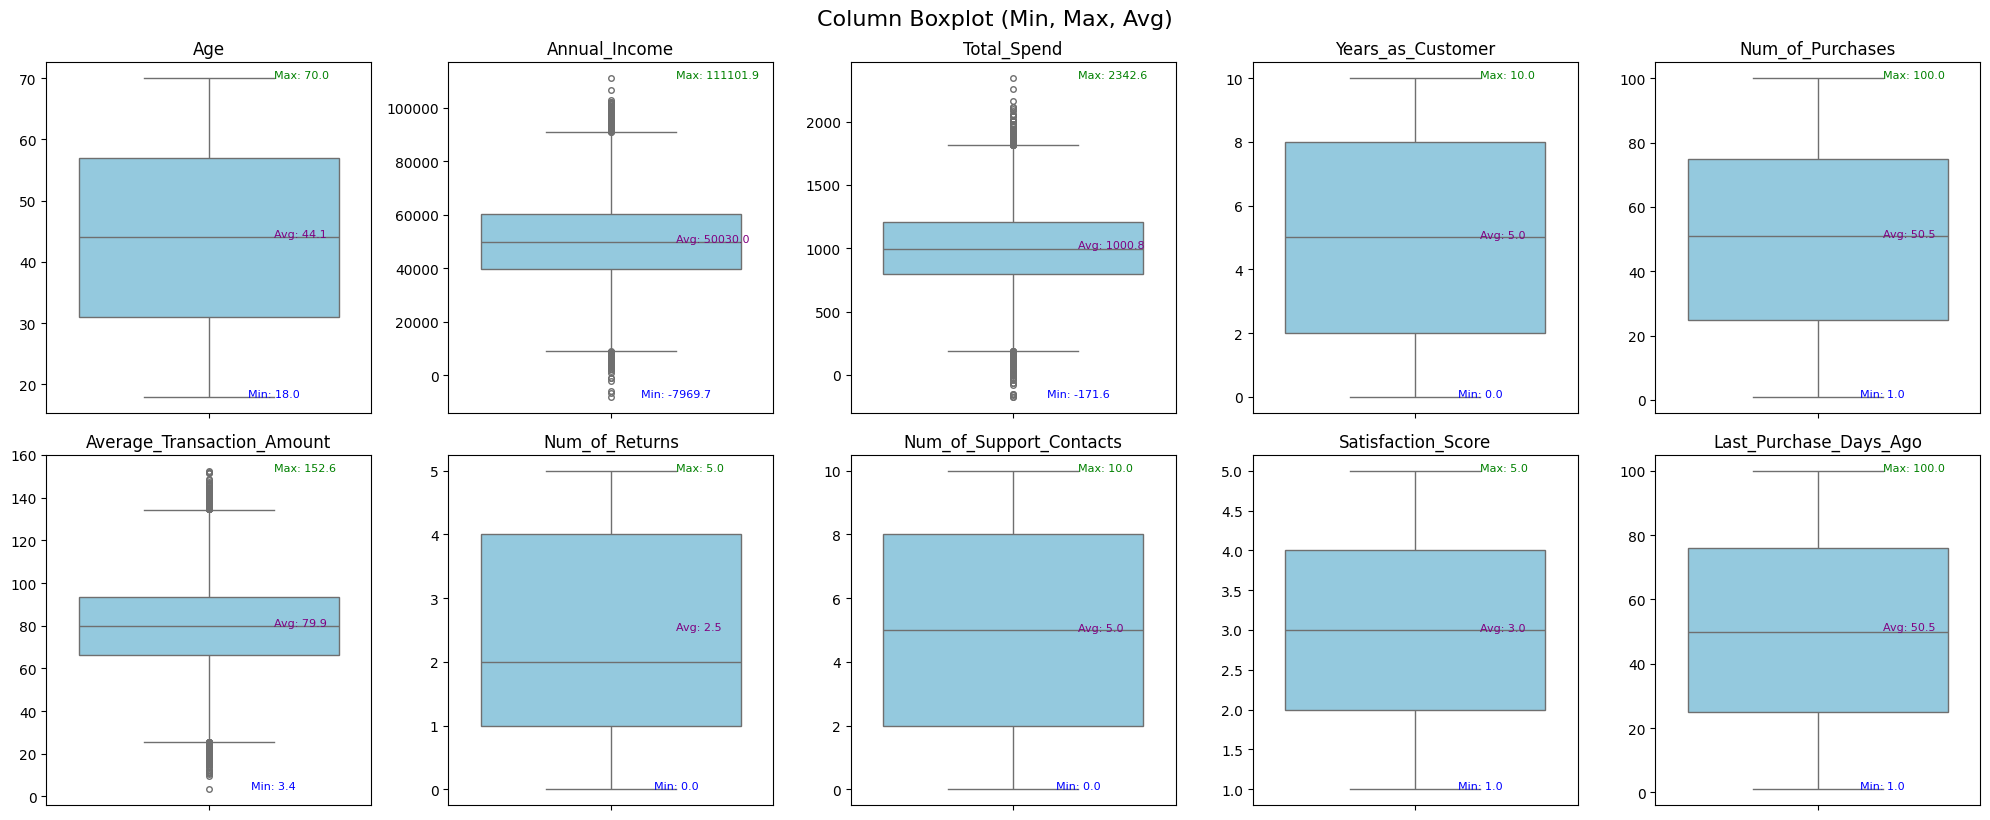

Target_Churn
False    15848
True     14152
Name: count, dtype: int64

In [9]:
# 이상치 찾기
# 나이, 연간소득, 총지출액, 고객유지연도수
# 1년 구매 횟수, 거래 지출 평균 금액, 품목수, 지원팀 문의 횟수
# 만족도, 마지막 구매 이후 경과 일수

import matplotlib.pyplot as plt
import seaborn as sns

# 수치형 컬럼 리스트
numeric_cols = ['Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer',
                'Num_of_Purchases', 'Average_Transaction_Amount',
                'Num_of_Returns', 'Num_of_Support_Contacts',
                'Satisfaction_Score', 'Last_Purchase_Days_Ago']

# subplot 행/열 수 설정
n_cols = 5
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 4, n_rows * 4))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    
    # boxplot 그리기 (이상치 강조 스타일 설정)
    sns.boxplot(y=df[col], color='skyblue',
                flierprops=dict(marker='o', color='red', markersize=4))  # 이상치 붉은 점으로 표시
    
    # 통계값 계산
    col_min = df[col].min()
    col_max = df[col].max()
    col_mean = df[col].mean()
    
    # 텍스트로 표시 (y축 기준, x=0.2 부근)
    plt.text(0.2, col_min, f"Min: {col_min:.1f}", ha='center', fontsize=8, color='blue')
    plt.text(0.2, col_max, f"Max: {col_max:.1f}", fontsize=8, color='green')
    plt.text(0.2, col_mean, f"Avg: {col_mean:.1f}", fontsize=8, color='purple')
    
    plt.title(col)
    plt.ylabel('')
    plt.tight_layout()

plt.suptitle("Column Boxplot (Min, Max, Avg)", fontsize=16, y=1.02)
plt.show()

df['Target_Churn'].value_counts()

In [10]:
def remove_outliers_iqr(df, cols):
    df_clean = df.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # 이상치가 아닌 데이터만 남김
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean


In [11]:
numeric_cols = ['Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer',
                'Num_of_Purchases', 'Average_Transaction_Amount',
                'Num_of_Returns', 'Num_of_Support_Contacts',
                'Satisfaction_Score', 'Last_Purchase_Days_Ago']

df_clean = remove_outliers_iqr(df, numeric_cols)
print(f"제거 전 데이터 수: {len(df)}, 제거 후: {len(df_clean)}")


제거 전 데이터 수: 30000, 제거 후: 29413


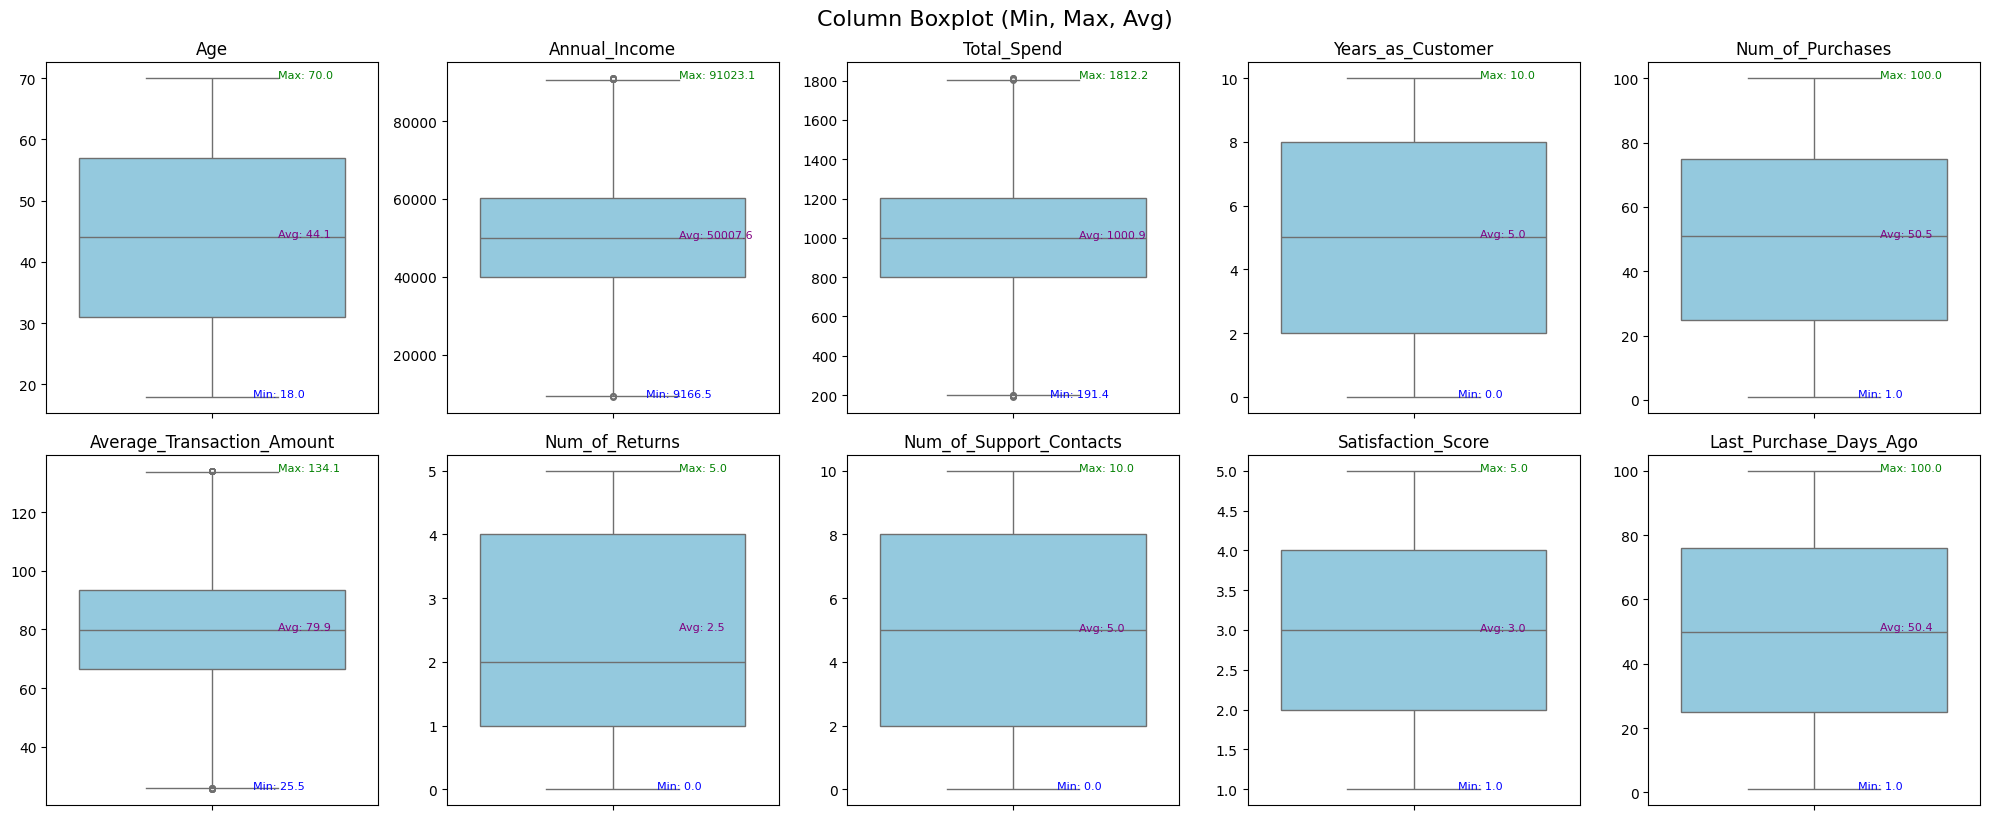

In [12]:
# 이상치 찾기
# 나이, 연간소득, 총지출액, 고객유지연도수
# 1년 구매 횟수, 거래 지출 평균 금액, 품목수, 지원팀 문의 횟수
# 만족도, 마지막 구매 이후 경과 일수

import matplotlib.pyplot as plt
import seaborn as sns

# 수치형 컬럼 리스트
numeric_cols = ['Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer',
                'Num_of_Purchases', 'Average_Transaction_Amount',
                'Num_of_Returns', 'Num_of_Support_Contacts',
                'Satisfaction_Score', 'Last_Purchase_Days_Ago']

# subplot 행/열 수 설정
n_cols = 5
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 4, n_rows * 4))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    
    # boxplot 그리기 (이상치 강조 스타일 설정)
    sns.boxplot(y=df_clean[col], color='skyblue',
                flierprops=dict(marker='o', color='red', markersize=4))  # 이상치 붉은 점으로 표시
    
    # 통계값 계산
    col_min = df_clean[col].min()
    col_max = df_clean[col].max()
    col_mean = df_clean[col].mean()
    
    # 텍스트로 표시 (y축 기준, x=0.2 부근)
    plt.text(0.2, col_min, f"Min: {col_min:.1f}", ha='center', fontsize=8, color='blue')
    plt.text(0.2, col_max, f"Max: {col_max:.1f}", fontsize=8, color='green')
    plt.text(0.2, col_mean, f"Avg: {col_mean:.1f}", fontsize=8, color='purple')
    
    plt.title(col)
    plt.ylabel('')
    plt.tight_layout()

plt.suptitle("Column Boxplot (Min, Max, Avg)", fontsize=16, y=1.02)
plt.show()


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

def drop_feature(df):
    return df.drop('Customer_ID', axis=1)

def gender_processed(df):
    df_gender_processed = df.copy()

# 'Other'를 정확히 반반으로 나누어 'Male' / 'Female'로 분산
    other_idx = df_gender_processed[df_gender_processed['Gender'] == 'Other'].index
    half = len(other_idx) // 2
    df_gender_processed.loc[other_idx[:half], 'Gender'] = 'Male'
    df_gender_processed.loc[other_idx[half:], 'Gender'] = 'Female'

    return df_gender_processed

def remove_gender_other(df):
    """Gender가 'Other'인 행 제거"""
    df_cleaned = df[df['Gender'] != 'Other'].copy()
    return df_cleaned

def encode_feature(df):
    # 원핫 인코딩 대상 컬럼
    category = ['Gender', 'Email_Opt_In', 'Promotion_Response']
    
    # 원핫 인코딩 적용 (drop_first=True는 다중공선성 회피용, 상황에 따라 False로 해도 OK)
    df_encoded = pd.get_dummies(df, columns=category, drop_first=True)
    
    return df_encoded

def scale_feature(train_data, test_data):

    # 스케일러 적용
    sc = StandardScaler()
    # sc = MinMaxScaler()

    train_scaled = sc.fit_transform(train_data)
    test_scaled = sc.transform(test_data)


    return train_scaled, test_scaled

def preprocess_data(df):
    df = drop_feature(df)
    # df = remove_gender_other(df)
    df = encode_feature(df)

    return df

In [14]:
from sklearn.model_selection import train_test_split
# 1. 전처리
rt_df = preprocess_data(df)

X = rt_df.drop('Target_Churn', axis=1)
y = rt_df['Target_Churn'].astype(int)

# 2. train/test 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 3. 수치형 컬럼만 스케일링
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

X_scaled_train = X_train.copy()
X_scaled_test = X_test.copy()

X_scaled_train[numeric_cols], X_scaled_test[numeric_cols] = scale_feature(
    X_train[numeric_cols], X_test[numeric_cols]
)
X_scaled_train.head()

,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Gender_Male,Email_Opt_In_True,Promotion_Response_Responded,Promotion_Response_Unsubscribed
3225,1.230085,1.503008,-0.696882,-0.000817,0.500369,-0.468411,-1.457029,-1.249094,0.718360,1.118319,True,False,False,True
11815,-1.113663,0.428621,-0.036767,-0.317078,1.296895,0.859867,0.296403,-1.564757,0.009918,0.153258,False,True,False,False
7338,-1.634496,-0.542902,0.473409,0.631705,0.223316,-0.442025,-0.288074,1.276215,-0.698523,-0.639471,False,False,False,True
14980,-1.569392,0.002645,0.641143,-0.000817,-0.296158,-0.622249,-0.288074,0.644887,-0.698523,1.531917,False,False,False,True
27167,-1.243871,3.789435,0.079903,0.315444,1.123737,-0.291175,0.880880,-1.564757,-1.406965,1.187252,True,True,False,False


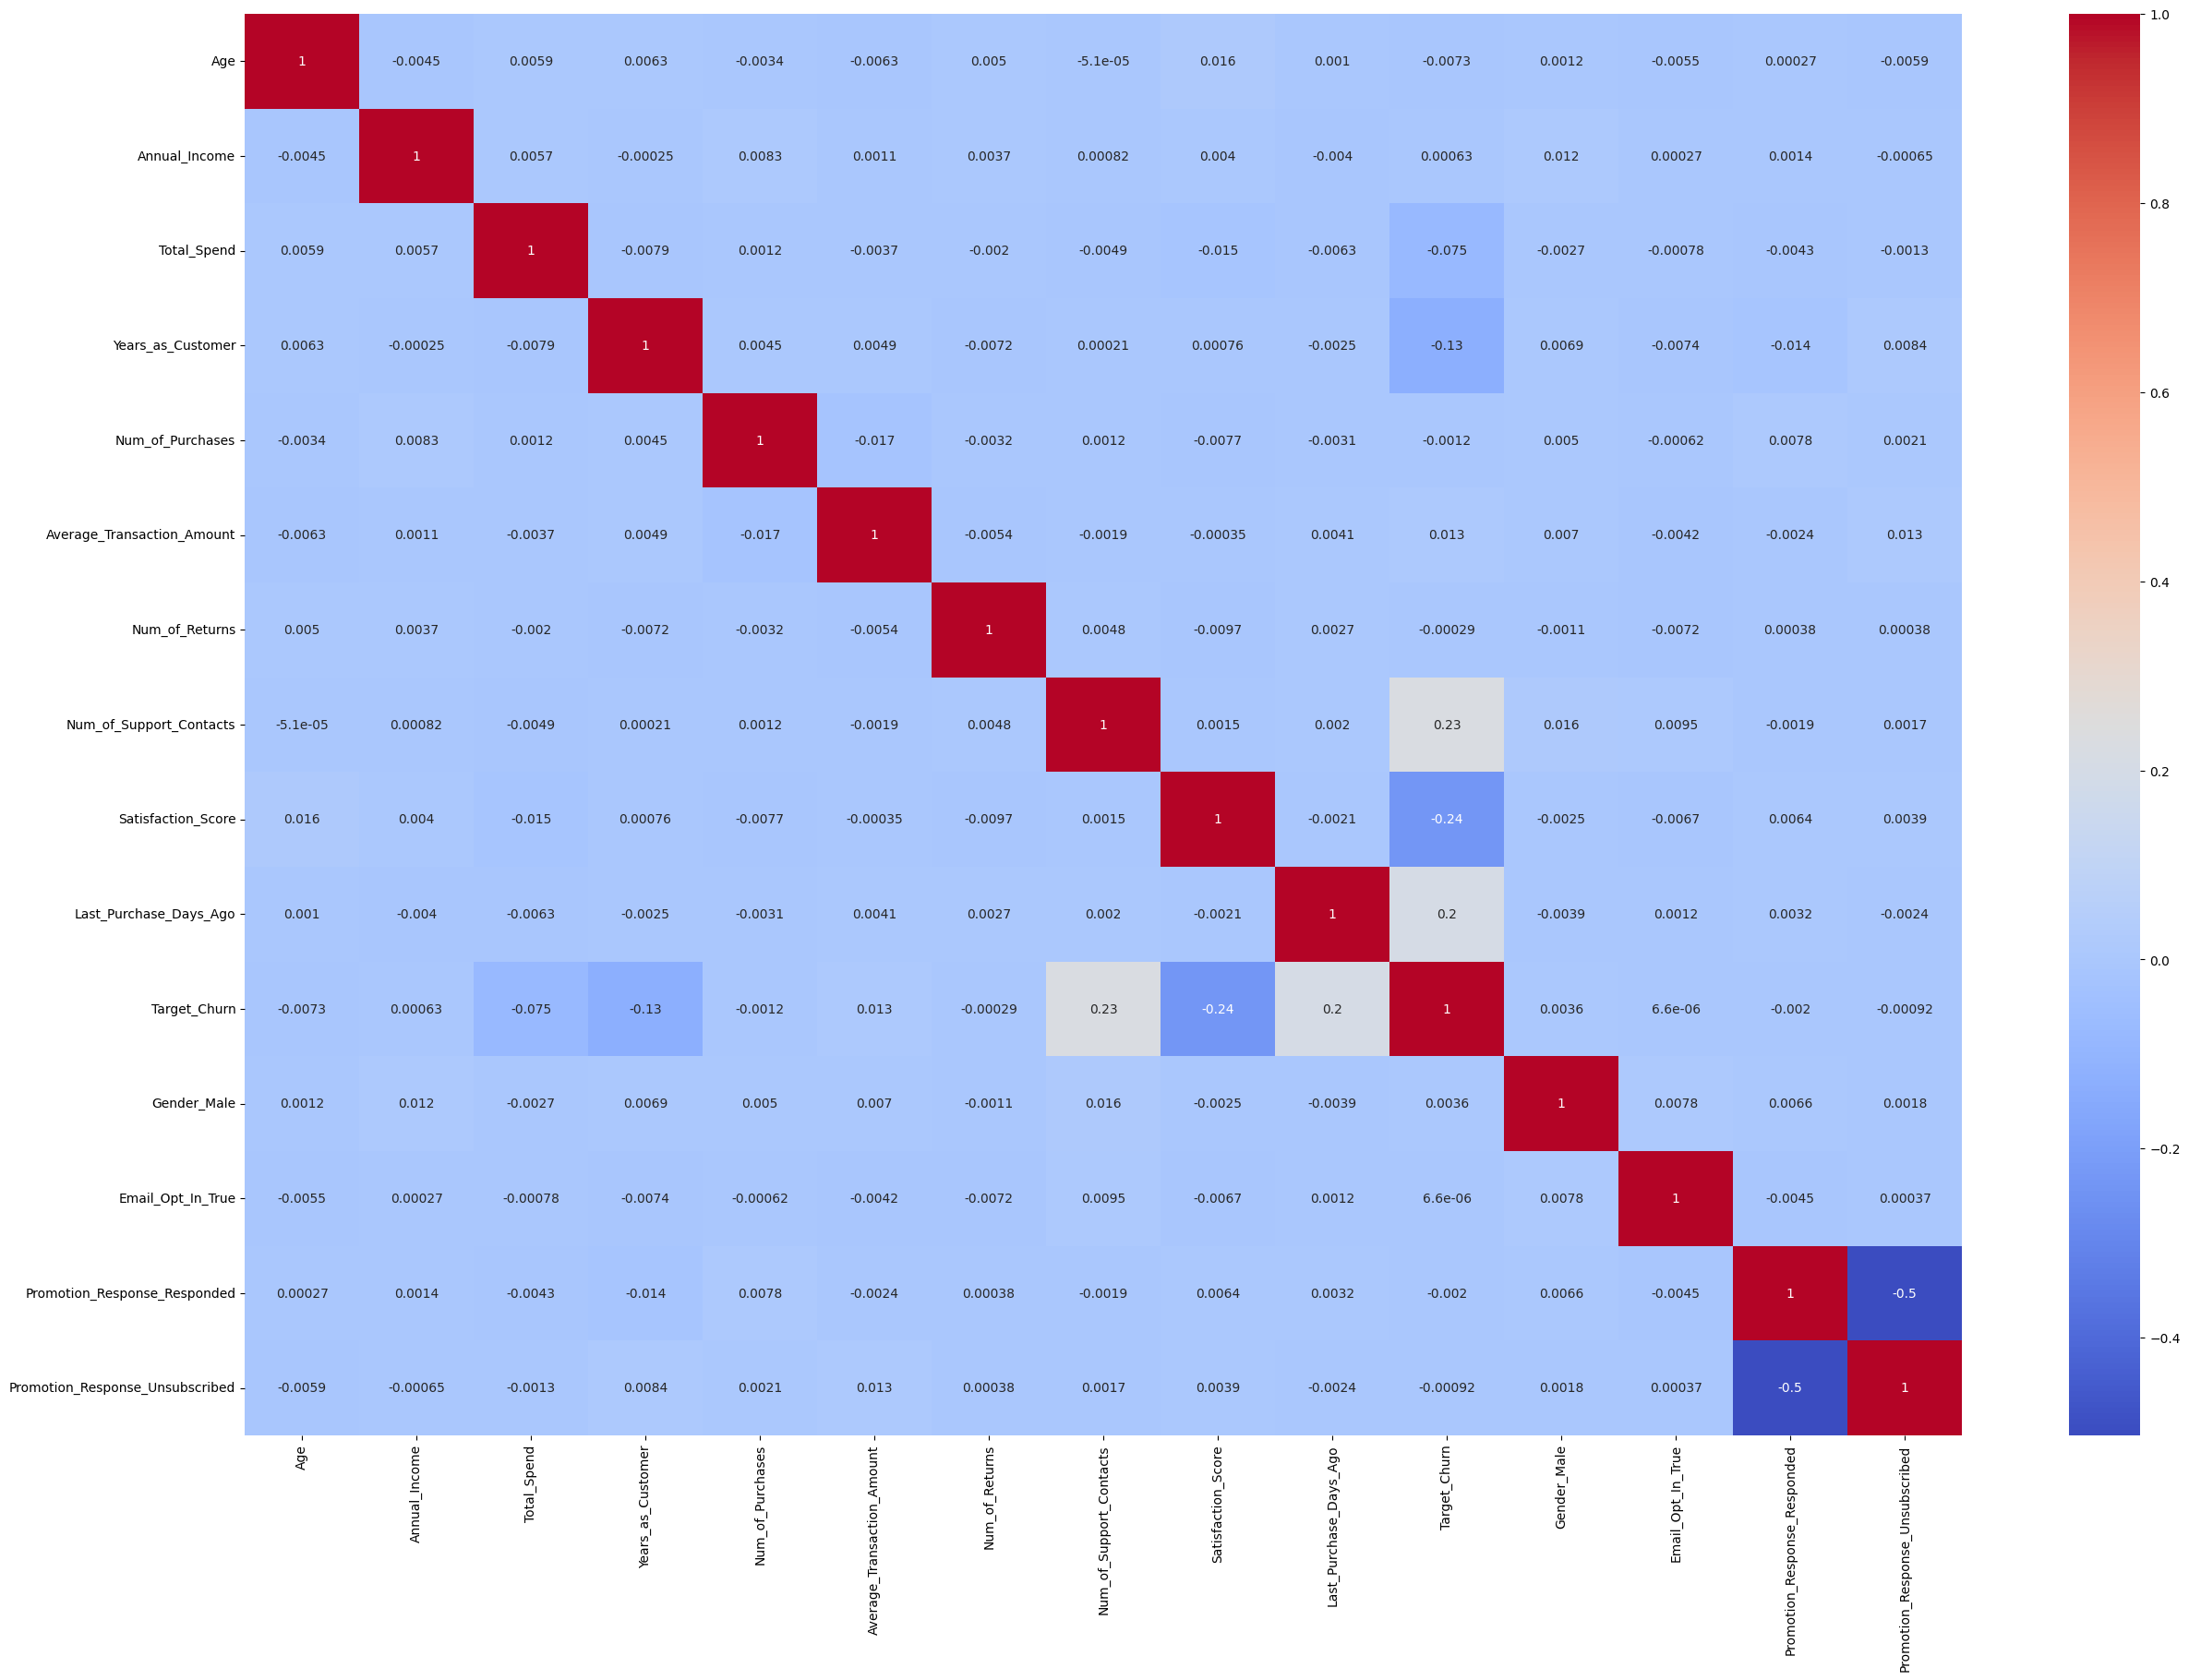

In [15]:
corr_matrix = rt_df.corr(numeric_only=True)
corr_matrix

plt.figure(figsize=(30, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

- 로지스틱 회귀

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(random_state=42, class_weight='balanced')
lr.fit(X_scaled_train, y_train)
y_pred = lr.predict(X_scaled_test)

print(f'훈련 데이터: {lr.score(X_scaled_train, y_train):.2f}')
print(f'테스트 데이터: {lr.score(X_scaled_test, y_test):.2f}')
print(classification_report(y_test, y_pred))


훈련 데이터: 0.70
테스트 데이터: 0.69
              precision    recall  f1-score   support

           0       0.72      0.68      0.70      3185
           1       0.66      0.71      0.68      2815

    accuracy                           0.69      6000
   macro avg       0.69      0.69      0.69      6000
weighted avg       0.69      0.69      0.69      6000



- RandomForest

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, max_depth=3, class_weight='balanced')
rf.fit(X_scaled_train, y_train)
y_pred = rf.predict(X_scaled_test)

print(f'훈련 데이터: {rf.score(X_scaled_train, y_train):.2f}')
print(f'테스트 데이터: {rf.score(X_scaled_test, y_test):.2f}')
print(classification_report(y_test, y_pred))

훈련 데이터: 0.80
테스트 데이터: 0.80
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      3185
           1       0.80      0.77      0.78      2815

    accuracy                           0.80      6000
   macro avg       0.80      0.80      0.80      6000
weighted avg       0.80      0.80      0.80      6000



In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 파라미터 후보 정의
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 3],
    'max_features': ['sqrt']
}

# 랜덤포레스트 모델과 그리드서치 객체 생성
rf = RandomForestClassifier(random_state=0)
grid = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='f1', cv=3, n_jobs=-1, verbose=1)

# 학습
grid.fit(X_scaled_train, y_train)

# 결과 출력
print(" 최적 하이퍼파라미터:", grid.best_params_)
print(" 교차검증 평균 F1-score:", grid.best_score_)

# 테스트 데이터에 대한 최종 평가
from sklearn.metrics import classification_report

best_model = grid.best_estimator_
y_pred = best_model.predict(X_scaled_test)

print("\n 테스트 데이터 평가 결과:")
print(classification_report(y_test, y_pred))

print(f'훈련 데이터: {best_model.score(X_scaled_train, y_train):.2f}')
print(f'테스트 데이터: {best_model.score(X_scaled_test, y_test):.2f}')


Fitting 3 folds for each of 16 candidates, totalling 48 fits
 최적 하이퍼파라미터: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
 교차검증 평균 F1-score: 0.785336678142189

 테스트 데이터 평가 결과:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      3185
           1       0.80      0.78      0.79      2815

    accuracy                           0.80      6000
   macro avg       0.80      0.80      0.80      6000
weighted avg       0.80      0.80      0.80      6000

훈련 데이터: 0.80
테스트 데이터: 0.80


In [19]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report
import numpy as np

# 목적 함수 정의
def objective(trial):
    model = RandomForestClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 150),
        max_depth=trial.suggest_int("max_depth", 2, 7),
        min_samples_split=trial.suggest_int("min_samples_split", 10, 40),
        min_samples_leaf=trial.suggest_int("min_samples_leaf", 5, 30),
        max_leaf_nodes=trial.suggest_int("max_leaf_nodes", 10, 50),
        max_features=trial.suggest_categorical("max_features", ["sqrt", "log2"]),
        max_samples=trial.suggest_float("max_samples", 0.5, 0.9),
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    )

    # ✅ StratifiedKFold로 클래스 비율 유지
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_scaled_train, y_train, scoring="f1", cv=cv)
    return score.mean()



# Optuna 스터디 실행
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=200)

# 최적 파라미터로 모델 학습
print("Best trial parameters:")
print(study.best_trial.params)

best_params = study.best_trial.params
# best_rf = RandomForestClassifier(**best_params, class_weight='balanced', random_state=42)
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_scaled_train, y_train)

# 테스트셋 평가
y_pred = best_rf.predict(X_scaled_test)
print("📊 Classification Report (F1 기반 튜닝 + balanced):")
print(classification_report(y_test, y_pred))


[I 2025-04-01 13:43:09,183] A new study created in memory with name: no-name-5309c3cd-e414-40ba-95a4-6cff109fe1e9
[I 2025-04-01 13:43:10,083] Trial 0 finished with value: 0.7710713849675235 and parameters: {'n_estimators': 67, 'max_depth': 4, 'min_samples_split': 23, 'min_samples_leaf': 26, 'max_leaf_nodes': 43, 'max_features': 'sqrt', 'max_samples': 0.6188941078134909}. Best is trial 0 with value: 0.7710713849675235.
[I 2025-04-01 13:43:11,796] Trial 1 finished with value: 0.7784439378705498 and parameters: {'n_estimators': 121, 'max_depth': 6, 'min_samples_split': 18, 'min_samples_leaf': 23, 'max_leaf_nodes': 10, 'max_features': 'log2', 'max_samples': 0.8873309409787984}. Best is trial 1 with value: 0.7784439378705498.
[I 2025-04-01 13:43:13,682] Trial 2 finished with value: 0.7839085138644133 and parameters: {'n_estimators': 134, 'max_depth': 6, 'min_samples_split': 17, 'min_samples_leaf': 28, 'max_leaf_nodes': 16, 'max_features': 'sqrt', 'max_samples': 0.6943882835139288}. Best is 

KeyboardInterrupt: 

In [20]:
# 테스트셋 평가
y_pred = best_rf.predict(X_scaled_test)
print("📊 Classification Report (F1 기반 튜닝 + balanced):")
print(classification_report(y_test, y_pred))

print(f'훈련 데이터: {best_rf.score(X_scaled_train, y_train):.2f}')
print(f'테스트 데이터: {best_rf.score(X_scaled_test, y_test):.2f}')


NameError: name 'best_rf' is not defined

- KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(X_scaled_train, y_train)

y_pred = kn.predict(X_scaled_test)
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

print(f'훈련 데이터: {kn.score(X_scaled_train, y_train):.2f}')
print(f'테스트 데이터: {kn.score(X_scaled_test, y_test):.2f}')

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.71      0.70      3185
           1       0.66      0.62      0.64      2815

    accuracy                           0.67      6000
   macro avg       0.67      0.67      0.67      6000
weighted avg       0.67      0.67      0.67      6000

훈련 데이터: 0.78
테스트 데이터: 0.67


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

params = {
    'n_neighbors': list(range(1, 31, 2)),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

grid = GridSearchCV(kn, param_grid=params, cv=5, scoring='f1_macro')
grid.fit(X_scaled_train, y_train)

print("최적의 파라미터:", grid.best_params_)
print("최적의 점수:", grid.best_score_)

best_kn = grid.best_estimator_
best_kn.fit(X_scaled_train, y_train)

# 예측 및 평가
y_pred = best_kn.predict(X_scaled_test)
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

print(f'훈련 데이터: {best_kn.score(X_scaled_train, y_train):.2f}')
print(f'테스트 데이터: {best_kn.score(X_scaled_test, y_test):.2f}')


KeyboardInterrupt: 

In [26]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# 파이프라인 구성: PCA → KNN
pipe = Pipeline([
    ('pca', PCA()),  # n_components는 아래 param_grid에서 조절
    ('knn', KNeighborsClassifier())
])

# 파라미터 그리드 설정 (pca + knn)
params = {
    'pca__n_components': [5, 10, 15],  # 너가 원하는 차원 수로 조정 가능
    'knn__n_neighbors': list(range(3, 15, 2)),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['minkowski', 'euclidean', 'manhattan']
}

# GridSearchCV 실행
grid = GridSearchCV(pipe, param_grid=params, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)
grid.fit(X_scaled_train, y_train)

print("최적의 파라미터:", grid.best_params_)
print("최적의 점수:", grid.best_score_)

# 최적 모델로 학습 및 평가
best_model = grid.best_estimator_
best_model.fit(X_scaled_train, y_train)

y_pred = best_model.predict(X_scaled_test)

print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

print(f'훈련 데이터: {best_model.score(X_scaled_train, y_train):.2f}')
print(f'테스트 데이터: {best_model.score(X_scaled_test, y_test):.2f}')


Fitting 5 folds for each of 108 candidates, totalling 540 fits


KeyboardInterrupt: 

- SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

svc = SVC()

params = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(svc, param_grid=params, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)
grid.fit(X_scaled_train, y_train)

print("최적의 파라미터:", grid.best_params_)
print("최적의 점수:", grid.best_score_)

best_svc = grid.best_estimator_
best_svc.fit(X_scaled_train, y_train)

y_pred = best_svc.predict(X_scaled_test)
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

print(f'훈련 데이터: {best_svc.score(X_scaled_train, y_train):.2f}')
print(f'테스트 데이터: {best_svc.score(X_scaled_test, y_test):.2f}')


Fitting 5 folds for each of 9 candidates, totalling 45 fits
최적의 파라미터: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
최적의 점수: 0.7326651951506202
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.80      0.76      3164
           1       0.75      0.66      0.70      2836

    accuracy                           0.73      6000
   macro avg       0.73      0.73      0.73      6000
weighted avg       0.73      0.73      0.73      6000

훈련 데이터: 0.76
테스트 데이터: 0.73


- XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

grid = GridSearchCV(xgb, param_grid=params, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)
grid.fit(X_scaled_train, y_train)

print("최적의 파라미터:", grid.best_params_)
print("최적의 점수:", grid.best_score_)

best_xgb = grid.best_estimator_
best_xgb.fit(X_scaled_train, y_train)

y_pred = best_xgb.predict(X_scaled_test)
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

print(f'훈련 데이터: {best_xgb.score(X_scaled_train, y_train):.2f}')
print(f'테스트 데이터: {best_xgb.score(X_scaled_test, y_test):.2f}')


Fitting 5 folds for each of 16 candidates, totalling 80 fits


c:\Users\junhe\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:09:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\junhe\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:09:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


최적의 파라미터: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
최적의 점수: 0.794258822735496
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81      3164
           1       0.80      0.75      0.77      2836

    accuracy                           0.79      6000
   macro avg       0.79      0.79      0.79      6000
weighted avg       0.79      0.79      0.79      6000

훈련 데이터: 0.80
테스트 데이터: 0.79


- LightGBM

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)

params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, -1],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [31, 50]
}

grid = GridSearchCV(lgbm, param_grid=params, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)
grid.fit(X_scaled_train, y_train)

print("최적의 파라미터:", grid.best_params_)
print("최적의 점수:", grid.best_score_)

best_lgbm = grid.best_estimator_
best_lgbm.fit(X_scaled_train, y_train)

y_pred = best_lgbm.predict(X_scaled_test)
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

print(f'훈련 데이터: {best_lgbm.score(X_scaled_train, y_train):.2f}')
print(f'테스트 데이터: {best_lgbm.score(X_scaled_test, y_test):.2f}')


Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\junhe\anaconda3\envs\pystudy_env\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\junhe\anaconda3\envs\pystudy_env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\junhe\anaconda3\envs\pystudy_env\Lib\subprocess.py", line 550, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\junhe\anaconda3\envs\pystudy_env\Lib\subprocess.py", line 1028, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\junhe\anaconda3\envs\pystudy_env\Lib\subprocess.py", line 154

[LightGBM] [Info] Number of positive: 11013, number of negative: 12987
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000573 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1066
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.458875 -> initscore=-0.164872
[LightGBM] [Info] Start training from score -0.164872
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\subprocess.py", line 550, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\subprocess.py", line 1028, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:

[LightGBM] [Info] Number of positive: 11337, number of negative: 12663
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1066
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.472375 -> initscore=-0.110613
[LightGBM] [Info] Start training from score -0.110613
최적의 파라미터: {'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 50}
최적의 점수: 0.8007269324239538
[LightGBM] [Info] Number of positive: 11337, number of negative: 12663
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

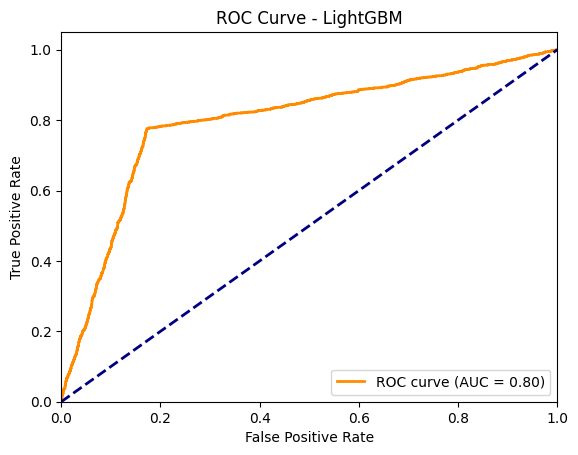

In [29]:
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_curve, auc

# LightGBM 모델 정의 및 GridSearchCV 설정
lgbm = LGBMClassifier(random_state=42)

params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, -1],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [31, 50]
}

grid = GridSearchCV(lgbm, param_grid=params, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)
grid.fit(X_scaled_train, y_train)

print("최적의 파라미터:", grid.best_params_)
print("최적의 점수:", grid.best_score_)

# 최적 모델 재학습 및 평가
best_lgbm = grid.best_estimator_
best_lgbm.fit(X_scaled_train, y_train)

y_pred = best_lgbm.predict(X_scaled_test)
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

print(f'훈련 데이터: {best_lgbm.score(X_scaled_train, y_train):.2f}')
print(f'테스트 데이터: {best_lgbm.score(X_scaled_test, y_test):.2f}')

# --------------------------
# ROC 커브 그리기
# --------------------------
# 최적 모델로부터 양성 클래스(예: 1)에 대한 예측 확률 계산
y_proba = best_lgbm.predict_proba(X_scaled_test)[:, 1]

# ROC 커브 계산
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# ROC 커브 시각화
plt.figure()
plt.plot(fpr, tpr, lw=2, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--', color='navy')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LightGBM')
plt.legend(loc="lower right")
plt.show()

- CatBoost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# 모델 생성
cat = CatBoostClassifier(verbose=0, random_state=42)

# 하이퍼파라미터 그리드 설정
params = {
    'iterations': [100, 200],
    'learning_rate': [0.05, 0.1],
    'depth': [4, 6, 8]
}

# GridSearchCV 실행
grid = GridSearchCV(cat, param_grid=params, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)
grid.fit(X_scaled_train, y_train)

print("CatBoost 최적 파라미터:", grid.best_params_)
print("CatBoost 최적 점수:", grid.best_score_)

# 최적 모델 평가
best_cat = grid.best_estimator_
best_cat.fit(X_scaled_train, y_train)

y_pred = best_cat.predict(X_scaled_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print(f'훈련 데이터: {best_cat.score(X_scaled_train, y_train):.2f}')
print(f'테스트 데이터: {best_cat.score(X_scaled_test, y_test):.2f}')


Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
2 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\catboost\core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, b

CatBoost 최적 파라미터: {'depth': 6, 'iterations': 100, 'learning_rate': 0.05}
CatBoost 최적 점수: 0.8009040441379633
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      3185
           1       0.80      0.78      0.79      2815

    accuracy                           0.80      6000
   macro avg       0.80      0.80      0.80      6000
weighted avg       0.80      0.80      0.80      6000

훈련 데이터: 0.80
테스트 데이터: 0.80


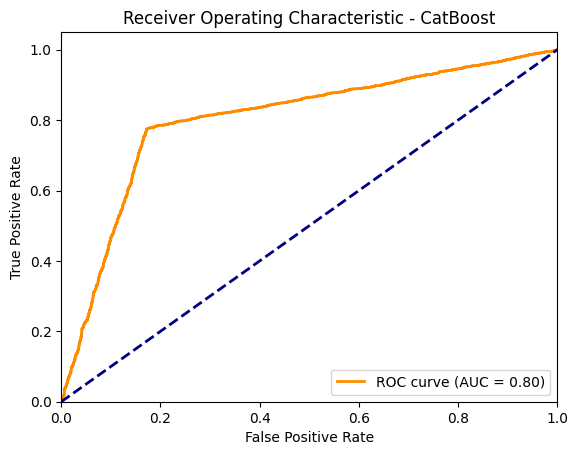

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 최적 모델로부터 확률 예측 (양성 클래스 확률)
y_proba = best_cat.predict_proba(X_scaled_test)[:, 1]

# ROC Curve 계산
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# ROC 커브 시각화
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - CatBoost')
plt.legend(loc="lower right")
plt.show()


- MLP